In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
import numpy as np
from datetime import datetime
from tensorflow.keras import layers   
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input,Dense, Dropout, Concatenate, RepeatVector,Reshape
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from numpy import array,hstack
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False
date_parse = lambda x: datetime.strptime(x, '%Y%m')
df=pd.read_csv('/Users/tonywu/Desktop/Thesis Code/Replication/fred-database_code/macro_1.csv', parse_dates=['date'],date_parser=date_parse)
df


/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_1248/3641935260.py:20: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('/Users/tonywu/Desktop/Thesis Code/Replication/fred-database_code/macro_1.csv', parse_dates=['date'],date_parser=date_parse)


,date,CMRMTSPLx,IPDCONGD,HWI,CES0600000007,AWHMAN,COMPAPFFx,EXSZUSx,DTCTHFNM,cum_return_1_0,fc2y,oa,rel_to_high_price,s2p,suv,dp,tms,svar
0,1962-09-01,-0.005515,0.021643,0.00,40.1,40.5,0.65,0.000417,-0.002382,0.066427,0.000000,0.000000,0.091331,0.000000,-0.603707,0.052634,0.0120,0.001177
1,1962-10-01,0.023127,-0.014016,-1.00,40.1,40.5,0.37,0.001134,0.000233,-0.077158,0.000000,0.000000,-0.048682,0.000000,-1.092758,0.003564,0.0121,0.003452
2,1962-11-01,-0.015738,0.012947,0.00,40.1,40.5,0.44,0.000301,-0.009637,-0.006790,0.000000,0.000000,-0.026811,0.000000,-0.388680,-0.088839,0.0113,0.001275
3,1962-12-01,0.019814,0.004280,-1.00,39.9,40.3,0.37,-0.000440,0.003066,0.151846,0.000000,0.000000,-0.048559,0.000000,0.840303,-0.005530,0.0108,0.000544
4,1963-01-01,0.010508,0.001065,0.00,40.1,40.5,0.29,-0.001343,0.004579,-0.131758,0.000000,0.000000,-0.048319,0.000000,0.985676,-0.044819,0.0107,0.000700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,2014-01-01,0.011664,0.017211,3.32,41.4,42.0,0.04,0.011458,-0.006242,-0.012358,-0.000161,-0.000118,0.002135,0.004548,-0.244559,0.047934,0.0338,0.001304
617,2014-02-01,-0.002521,0.000857,0.67,41.2,41.9,0.05,-0.021704,0.007804,-0.048947,-0.000502,0.000000,-0.058508,-0.009454,0.165406,-0.030646,0.0334,0.001254
618,2014-03-01,-0.012748,-0.032239,-0.60,41.0,41.7,0.05,0.011686,-0.007160,0.067066,0.002862,0.000216,0.027385,-0.004230,0.151552,0.004527,0.0332,0.000869
619,2014-04-01,0.005713,0.026851,4.61,40.8,41.5,0.06,-0.011238,-0.002797,-0.032547,-0.002862,-0.000055,-0.011307,-0.000735,-0.154830,0.004370,0.0323,0.001363


In [20]:
date_parse = lambda x: datetime.strptime(x, '%Y%m')
df=pd.read_csv('.../fred-database_code/macro_1.csv', parse_dates=['date'],date_parser=date_parse)
df

/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_1248/968562709.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df=pd.read_csv('/Users/tonywu/Desktop/Thesis Code/Replication/fred-database_code/macro_1.csv', parse_dates=['date'],date_parser=date_parse)


,date,CMRMTSPLx,IPDCONGD,HWI,CES0600000007,AWHMAN,COMPAPFFx,EXSZUSx,DTCTHFNM,cum_return_1_0,fc2y,oa,rel_to_high_price,s2p,suv,dp,tms,svar
0,1962-09-01,-0.005515,0.021643,0.00,40.1,40.5,0.65,0.000417,-0.002382,0.066427,0.000000,0.000000,0.091331,0.000000,-0.603707,0.052634,0.0120,0.001177
1,1962-10-01,0.023127,-0.014016,-1.00,40.1,40.5,0.37,0.001134,0.000233,-0.077158,0.000000,0.000000,-0.048682,0.000000,-1.092758,0.003564,0.0121,0.003452
2,1962-11-01,-0.015738,0.012947,0.00,40.1,40.5,0.44,0.000301,-0.009637,-0.006790,0.000000,0.000000,-0.026811,0.000000,-0.388680,-0.088839,0.0113,0.001275
3,1962-12-01,0.019814,0.004280,-1.00,39.9,40.3,0.37,-0.000440,0.003066,0.151846,0.000000,0.000000,-0.048559,0.000000,0.840303,-0.005530,0.0108,0.000544
4,1963-01-01,0.010508,0.001065,0.00,40.1,40.5,0.29,-0.001343,0.004579,-0.131758,0.000000,0.000000,-0.048319,0.000000,0.985676,-0.044819,0.0107,0.000700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,2014-01-01,0.011664,0.017211,3.32,41.4,42.0,0.04,0.011458,-0.006242,-0.012358,-0.000161,-0.000118,0.002135,0.004548,-0.244559,0.047934,0.0338,0.001304
617,2014-02-01,-0.002521,0.000857,0.67,41.2,41.9,0.05,-0.021704,0.007804,-0.048947,-0.000502,0.000000,-0.058508,-0.009454,0.165406,-0.030646,0.0334,0.001254
618,2014-03-01,-0.012748,-0.032239,-0.60,41.0,41.7,0.05,0.011686,-0.007160,0.067066,0.002862,0.000216,0.027385,-0.004230,0.151552,0.004527,0.0332,0.000869
619,2014-04-01,0.005713,0.026851,4.61,40.8,41.5,0.06,-0.011238,-0.002797,-0.032547,-0.002862,-0.000055,-0.011307,-0.000735,-0.154830,0.004370,0.0323,0.001363


In [21]:
df_1.set_index('date')[['S&P 500','UNRATE']].plot(subplots=True)

NameError: name 'df_1' is not defined

In [22]:
df_input=df.loc[:, df.columns != 'date'] 
feature_columns = df_input.columns
for i, column in enumerate(feature_columns):
    exec(f"x_{i + 1} = df_input['{column}'].values")
for i in range(len(df_input.columns)):
    exec(f"x_{i+1} = x_{i+1}.reshape((len(x_{i+1}), 1))")
    
print("x_1_shape:", x_1.shape)

x_1_shape: (621, 1)


In [23]:
#Standardization
scaler = StandardScaler()
for i in range(len(df_input.columns)):
    exec(f"scaler=scaler.fit(x_{i+1})")
    exec(f"x_{i+1}_scaled=scaler.transform(x_{i+1})")
num_variables = len(df_input.columns)
# Stack them horizontally
variable_list = [globals()[f"x_{i}_scaled"] for i in range(1, num_variables + 1)]
stacked_data = np.hstack(variable_list)
stacked_data.shape

(621, 17)

In [24]:
def split_sequence(sequences,n_steps_in,n_steps_out):
    X,y = list(),list()
    for i in range(len(sequences)):
        end_ix=i+n_steps_in
        out_end_ix=end_ix+n_steps_out-1
        if out_end_ix>len(sequences):
            break
        
        seq_x,seq_y=sequences[i:end_ix,:len(df)],sequences[end_ix-1:out_end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)
n_steps_in,n_steps_out= 12,1
X,y = split_sequence(stacked_data ,n_steps_in,n_steps_out)
print ("X.shape",X.shape)
print("y.shape",y.shape)


X.shape (610, 12, 17)
y.shape (610, 1)


Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_32 (InputLayer)       [(None, 12, 17)]          0         
                                                                 
 LSTM_2 (LSTM)               [(None, 12, 4),           352       
                              (None, 4),                         
                              (None, 4)]                         
                                                                 
 output_layer (Dense)        (None, 12, 4)             20        
                                                                 
Total params: 372
Trainable params: 372
Non-trainable params: 0
_________________________________________________________________
20/20 [==============================] - 0s 2ms/step
      Unit_1    Unit_2    Unit_3    Unit_4
0  -0.437407  0.002164  0.012900  0.203567
1  -0.415014  0.003492 -0.053303  0.257611
2  -0.0622

/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_1248/3831840255.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(input_to_hidden_weights_df.index, rotation=90)
/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_1248/3831840255.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(input_to_hidden_weights_df.index, rotation=90)
/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_1248/3831840255.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(input_to_hidden_weights_df.index, rotation=90)
/var/folders/fj/g5rgz0_j4wj1zbz0tr6xdmrh0000gn/T/ipykernel_1248/3831840255.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

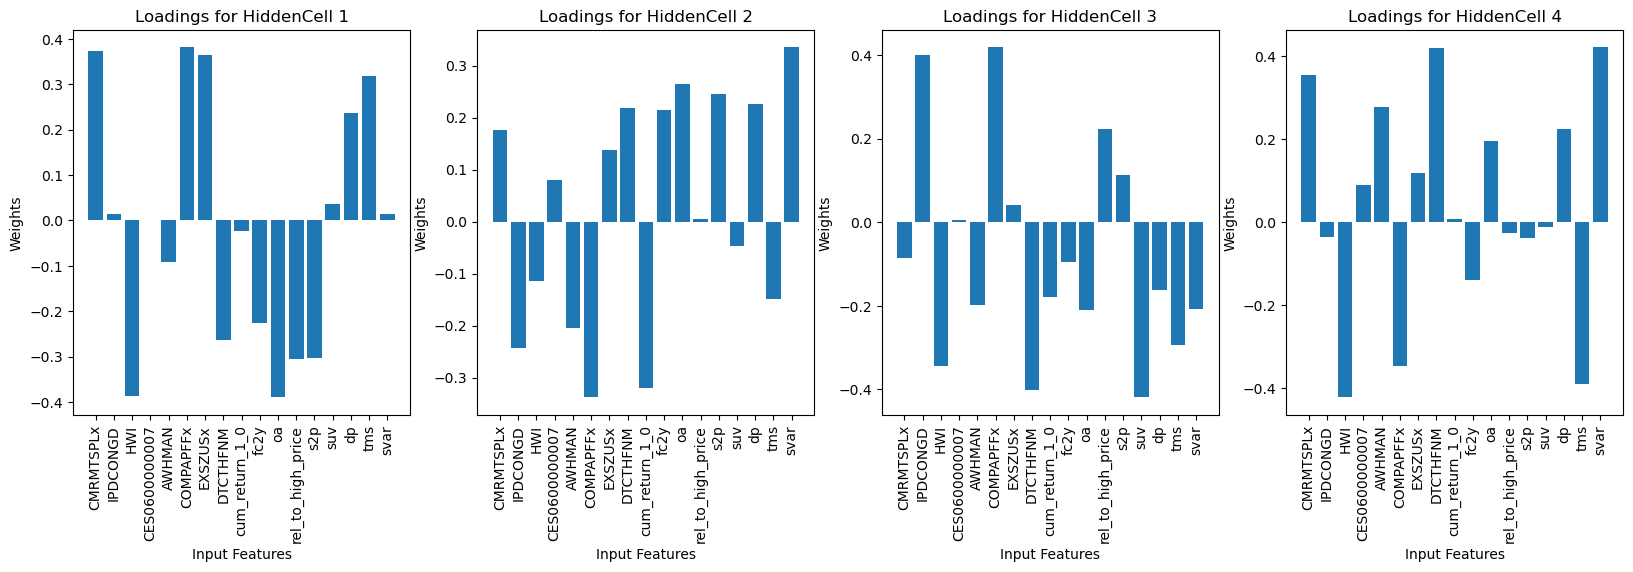

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM,TimeDistributed
import numpy as np
import tensorflow as tf
inputs = Input(shape=(n_steps_in, 17))

train, val = train_test_split(stacked_data, test_size=0.2, random_state=42)

X_train, y_train = [], []

for i in range(len(train) - n_steps_in - n_steps_out):
    X_seq = stacked_data[i:i + n_steps_in, :]
    y_seq = stacked_data[i + n_steps_in:i + n_steps_in + n_steps_out, :]  # Adjust to match the output shape
    
    X_train.append(X_seq)
    y_train.append(y_seq)

X_train = np.array(X_train)
y_train = np.array(y_train)


X_val, y_val = [], []

for i in range(len(val) - n_steps_in - n_steps_out):
    X_seq = stacked_data[i:i + n_steps_in, :]
    y_seq = stacked_data[i + n_steps_in:i + n_steps_in + n_steps_out, :]  # Adjust to match the output shape
    
    X_val.append(X_seq)
    y_val.append(y_seq)

X_val = np.array(X_val)
y_val = np.array(y_val)

inputs = Input(shape=(n_steps_in, 17))
lstm_layer_2, _, _ = LSTM(4, recurrent_dropout=0.9, activation='tanh', return_sequences=True, return_state=True, name='LSTM_2')(inputs)
output_layer = Dense(4, activation='linear', name='output_layer')(lstm_layer_2)  # Assuming your output has 178 dimensions

model = Model(inputs=inputs, outputs=output_layer)

model.compile(optimizer='adam', loss='mse')
model.summary()
outputs = model.predict(X)

factor_loadings = outputs[1]

column_names = [f'Unit_{i+1}' for i in range(factor_loadings.shape[1])]
factor_loadings_df = pd.DataFrame(factor_loadings, columns=column_names)

# Display the DataFrame
print(factor_loadings_df)

weights = model.get_layer('LSTM_2').get_weights()


import pandas as pd

featureweights = weights[0][:, :4]  # Extract only the input-to-hidden weights
column_names = df.columns.tolist()[1:]
column_names

input_to_hidden_weights_df = pd.DataFrame(featureweights, index=column_names)

# Display the DataFrame

print(input_to_hidden_weights_df)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, column in enumerate(input_to_hidden_weights_df.columns):
    ax = axes[i]
    ax.bar(input_to_hidden_weights_df.index, input_to_hidden_weights_df[column])
    ax.set_xlabel('Input Features')
    ax.set_ylabel('Weights')
    ax.set_title(f'Loadings for HiddenCell {i + 1}')
    ax.set_xticklabels(input_to_hidden_weights_df.index, rotation=90) 
    plt.savefig(f'unit_{i + 1}_weights_time6.png', bbox_inches='tight')  
plt.show()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 12, 17)]          0         
                                                                 
 LSTM_2 (LSTM)               [(None, 12, 4),           352       
                              (None, 4),                         
                              (None, 4)]                         
                                                                 
 output_layer (Dense)        (None, 12, 17)            85        
                                                                 
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________
20/20 [==============================] - 0s 2ms/step
Epoch 1/100
16/16 [==============================] - 2s 20ms/step - loss: 1.0303 - val_loss: 0.8566
Epoch 2/100
16/16 [=====================

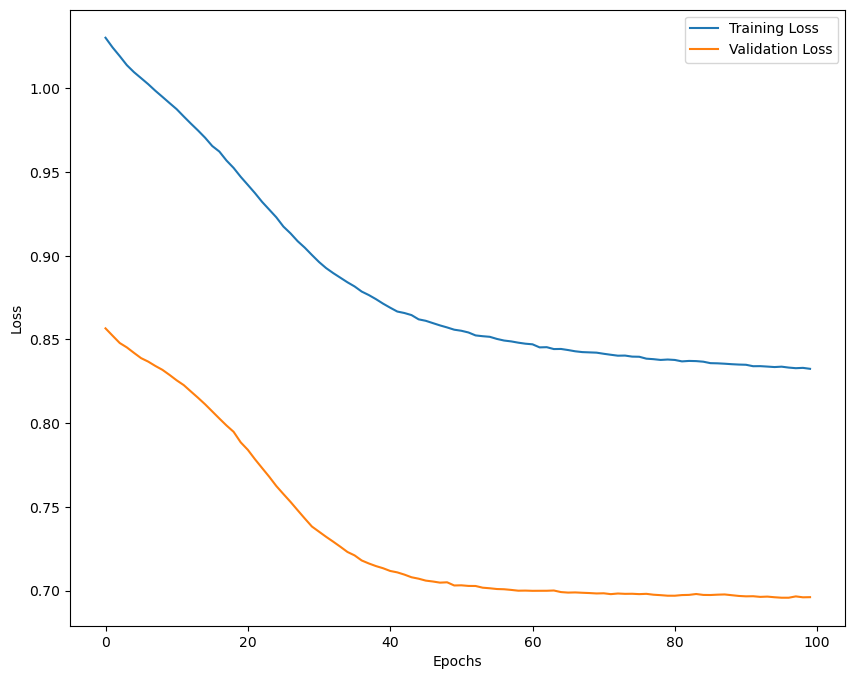

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM,TimeDistributed
import numpy as np
import tensorflow as tf
inputs = Input(shape=(n_steps_in, 17))

train, val = train_test_split(stacked_data, test_size=0.2, random_state=42)

X_train, y_train = [], []

for i in range(len(train) - n_steps_in - n_steps_out):
    X_seq = stacked_data[i:i + n_steps_in, :]
    y_seq = stacked_data[i + n_steps_in:i + n_steps_in + n_steps_out, :]  # Adjust to match the output shape
    
    X_train.append(X_seq)
    y_train.append(y_seq)

X_train = np.array(X_train)
y_train = np.array(y_train)


X_val, y_val = [], []

for i in range(len(val) - n_steps_in - n_steps_out):
    X_seq = stacked_data[i:i + n_steps_in, :]
    y_seq = stacked_data[i + n_steps_in:i + n_steps_in + n_steps_out, :]  # Adjust to match the output shape
    
    X_val.append(X_seq)
    y_val.append(y_seq)

X_val = np.array(X_val)
y_val = np.array(y_val)

inputs = Input(shape=(n_steps_in, 17))
lstm_layer_2, _, _ = LSTM(4, recurrent_dropout=0.9, activation='tanh', return_sequences=True, return_state=True, name='LSTM_2')(inputs)
output_layer = Dense(17, activation='linear', name='output_layer')(lstm_layer_2)  # Assuming your output has 178 dimensions

model = Model(inputs=inputs, outputs=output_layer)

model.compile(optimizer='adam', loss='mse')
model.summary()
outputs = model.predict(X)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_time12.png')